In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])

In [4]:
p_mean = np.mean(scores)
p_var = np.var(scores)
p_mean,  p_var

(69.53, 206.6691)

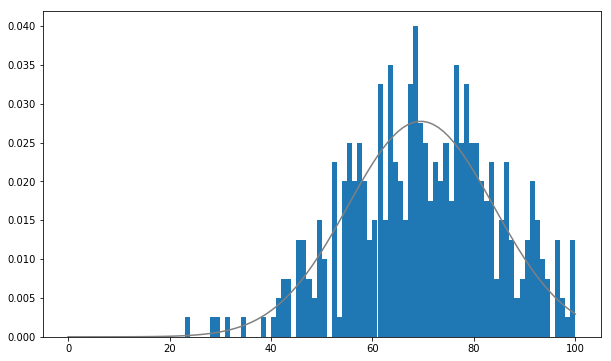

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0,100), density=True)
plt.show()

In [8]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [9]:
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

In [10]:
samples.shape

(10000, 20)

In [11]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}回目の標本平均：{s_mean:.3f}')

1回目の標本平均：67.000
2回目の標本平均：72.850
3回目の標本平均：69.200
4回目の標本平均：64.450
5回目の標本平均：72.650


In [12]:
np.mean(samples)

69.538

In [13]:
np.mean(np.random.choice(scores, int(1e6)))

69.542954

In [15]:
np.mean(sample)

70.4

In [16]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}回目の標本分散：{s_var:.3f}')

1回目の標本分散：116.800
2回目の標本分散：162.928
3回目の標本分散：187.060
4回目の標本分散：149.148
5回目の標本分散：111.528


In [17]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.34417850000003

In [18]:
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.67808263157895

In [19]:
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.08336592317

In [29]:
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

In [30]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)
lcl, ucl

(66.34956018535247, 78.95043981464754)

In [22]:
# 95%信頼区間

In [24]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)

0.951

In [25]:
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)
lcl, hcl

(91.52471947132238, 337.5955129124592)

In [26]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1)* u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
cnt / len(samples)

0.964

In [28]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_var/n)
lcl, ucl

(67.70745985695861, 77.5925401430414)

In [32]:
enquete_df = pd.read_csv('../data/ch10_enquete.csv')
enquete = np.array(enquete_df['知っている'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [33]:
s_mean = enquete.mean()
s_mean

0.709

In [34]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)
lcl, ucl

(0.6808474522924337, 0.7371525477075662)

In [35]:
n_access_df = pd.read_csv('../data/ch10_access.csv')
n_access = np.array(n_access_df['アクセス数'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8])

In [36]:
s_mean = n_access.mean()
s_mean

10.444444444444445

In [37]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)
lcl, ucl

(9.697953549598202, 11.190935339290688)